In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# shows images larger
def display(img, cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

In [3]:
sep_coins = cv2.imread('Computer-Vision-with-Python/DATA/pennies.jpg')

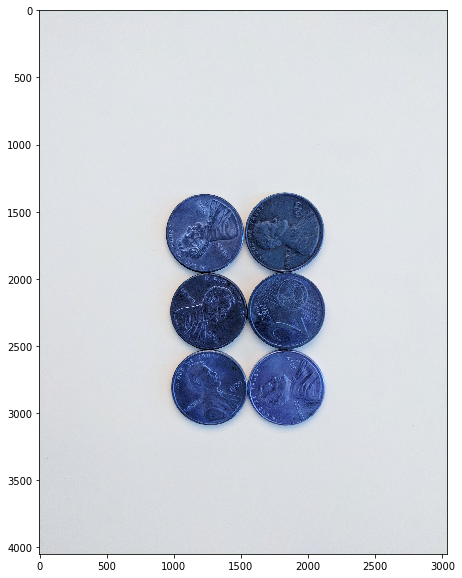

In [4]:
display(sep_coins)

In [5]:
# approach of regular algorithms
# ---------------------------------
# Median Blur
# Grayscale
# Binary Threshold (to make it B&W)
# Find contours


In [6]:
sep_blur = cv2.medianBlur(sep_coins, 25)

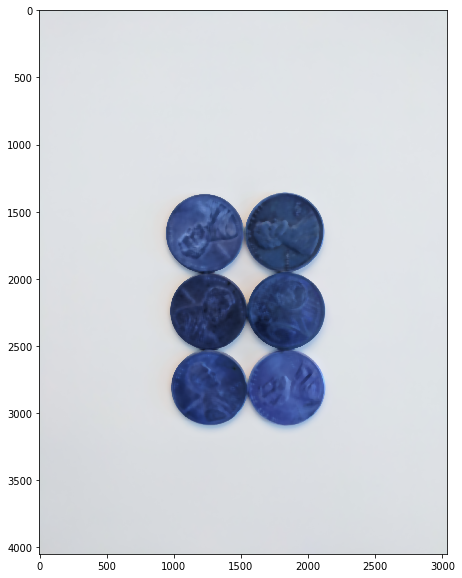

In [7]:
display(sep_blur)

In [8]:
gray_sep_coins = cv2.cvtColor(sep_blur, cv2.COLOR_BGR2GRAY)

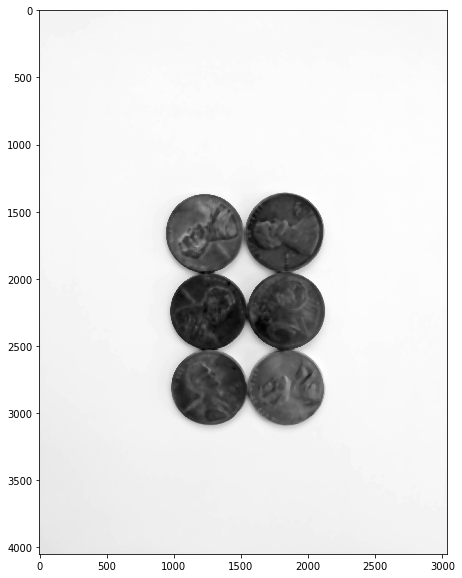

In [9]:
display(gray_sep_coins)

In [10]:
ret , sep_thres = cv2.threshold(gray_sep_coins, 160, 255, cv2.THRESH_BINARY_INV)

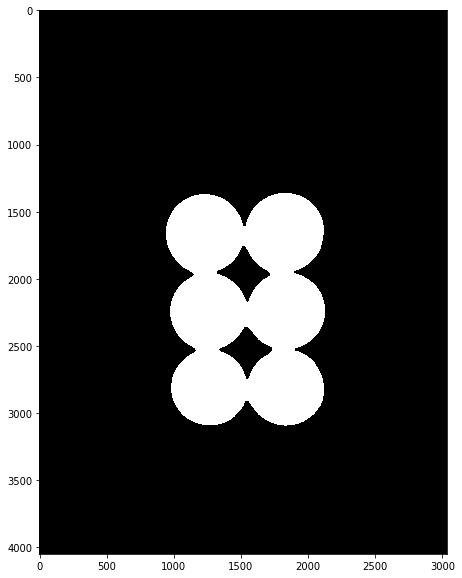

In [12]:
display(sep_thres)

In [13]:
image, contours, hierarchy = cv2.findContours(sep_thres.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [14]:
for i in range(len(contours)):
    
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins, contours, i, (255, 0, 0), 10)

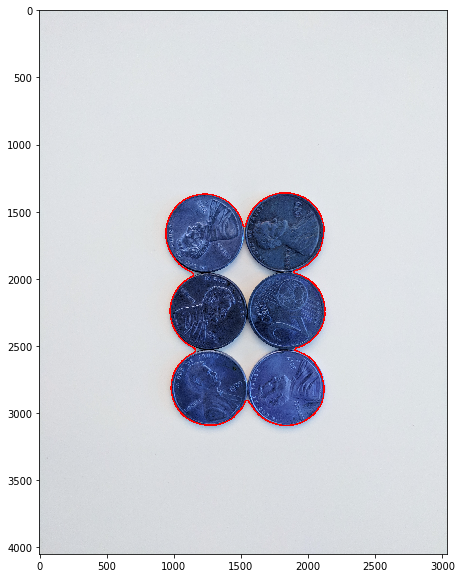

In [15]:
display(sep_coins)

WATERSHED ALGORITHM APPROACH

In [16]:
# step 1 - read the image 
img = cv2.imread('Computer-Vision-with-Python/DATA/pennies.jpg')

In [17]:
# step 2 - apply blur 
img = cv2.medianBlur(img,35)

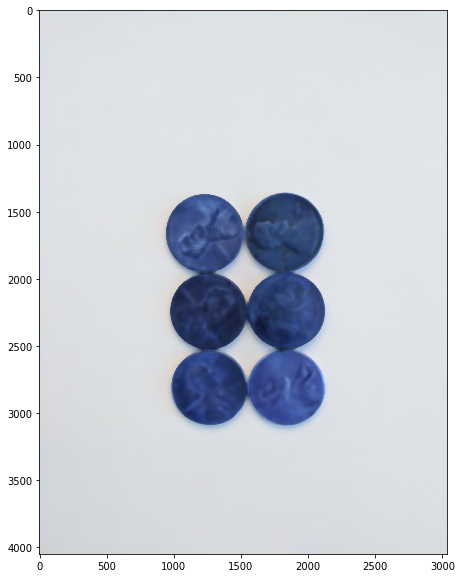

In [18]:
display(img)

In [19]:
# step 3-  convert to grayscale 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [22]:
# step 4 - apply threshold using Otsu's method
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

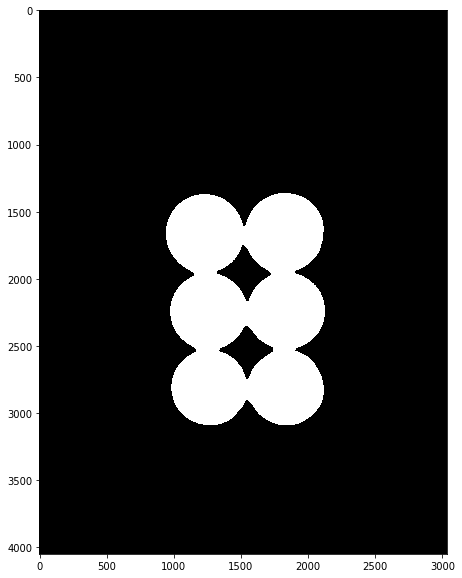

In [23]:
display(thresh)

In [24]:
# step 5 - noise removal 
kernel = np.ones((3,3), np.uint8)

In [25]:
kernel 

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

In [26]:
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

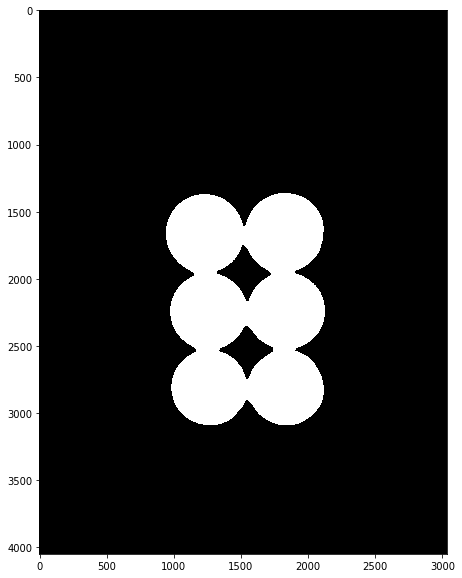

In [28]:
display(opening)

In [29]:
# using Distance Transform to make the center brighter than the edges
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2,5)

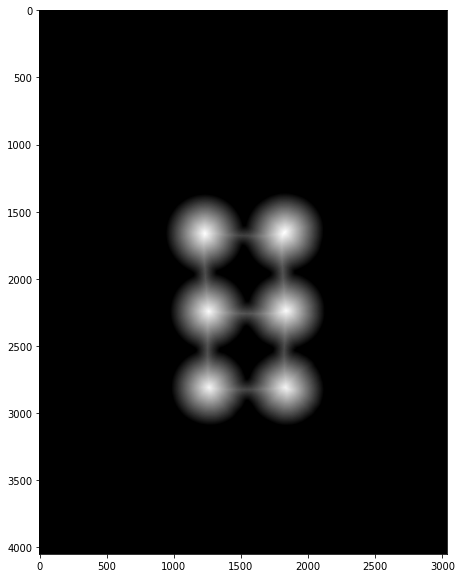

In [30]:
display(dist_transform)

In [31]:
ret, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)

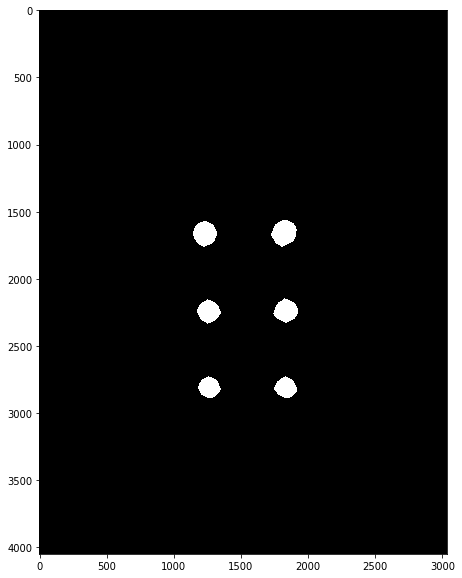

In [37]:
display(sure_fg)

In [38]:
sure_bg = cv2.dilate(opening, kernel, iterations=3)

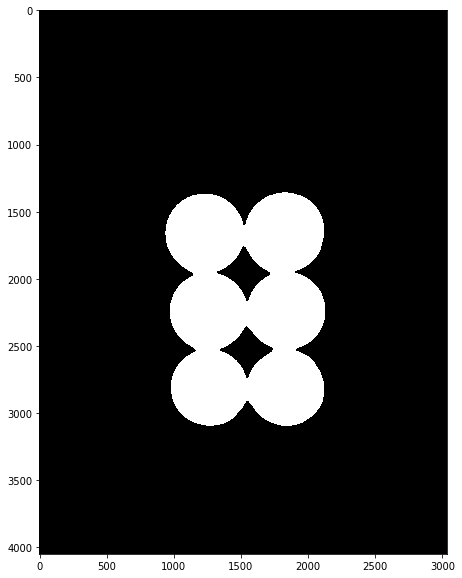

In [39]:
display(sure_bg)

In [33]:
sure_fg = np.uint8(sure_fg)

In [40]:
unknown = cv2.subtract(sure_bg,sure_fg)

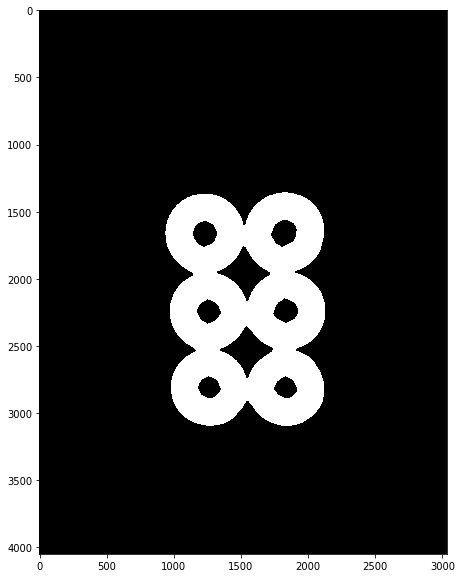

In [41]:
display(unknown)

In [42]:
ret, markers = cv2.connectedComponents(sure_fg)

In [44]:
markers = markers + 1

In [45]:
markers[unknown == 255] = 0

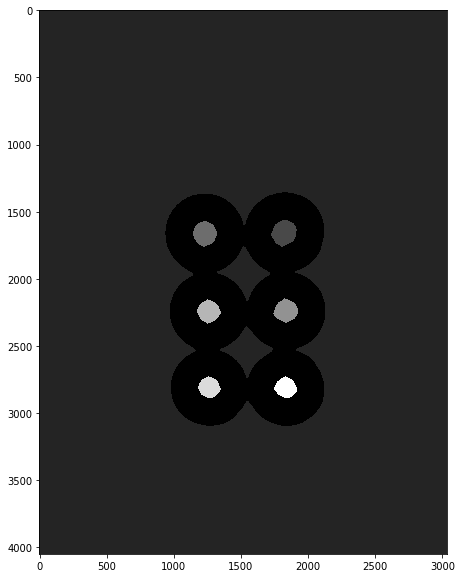

In [46]:
display(markers) # we finally have our markers for the watershed algorithm

In [47]:
markers = cv2.watershed(img, markers)

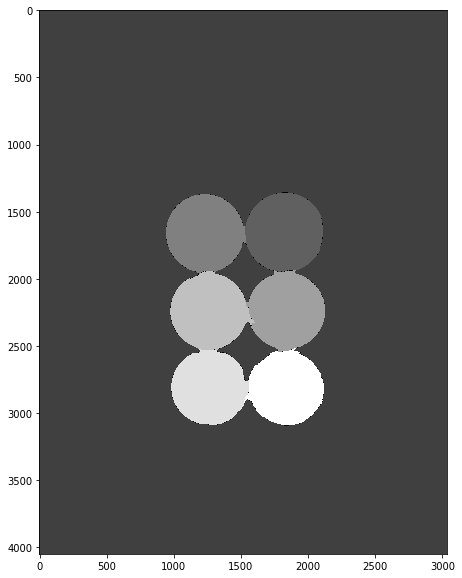

In [48]:
display(markers)

In [49]:
# finding and drawing contours
image, contours, hierarchy = cv2.findContours(markers.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins, contours, i, (255, 0, 0), 10)

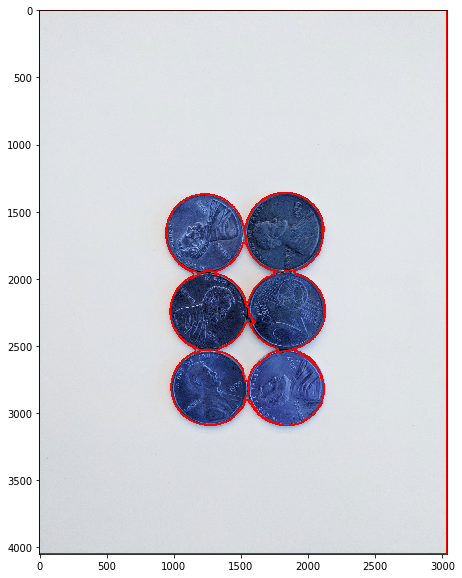

In [50]:
display(sep_coins)